# Brief 10 - Labyrinthe

## Tracer du labyrinthe  
On utilisera le code (en le modifiant pour extraire notamment un graphe sous forme de dictionnaire)  
Source:  
http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/profondeur/3_python2.html

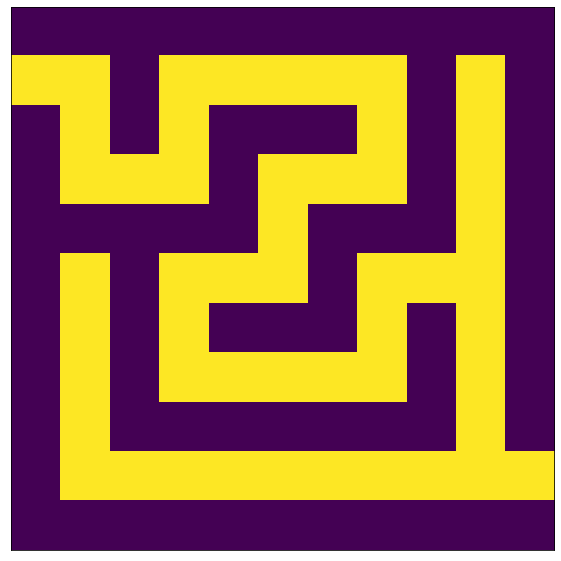

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Dimensions de la grille:
LARGEUR = 5
HAUTEUR = 5
TAILLE_LARG= 2 * LARGEUR + 1
TAILLE_HAUT= 2 * HAUTEUR + 1

random.seed(4) # Graphe de référence

class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur








def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]

    #print(f"fct voisinage / avant boucle for: i: {i} j: {j} couple: {couple}")

    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        
        #print(f"fct voisinage / boucle for: i: {i} j: {j} d: {d} i+d:{i+d} j+d:{j+d}")

    #print(f"fct voisinage / aprés boucle for: i: {i} j: {j} listeVoisin: {listeVoisins}\n")
    #dic[couple]= listeVoisins
    
    return listeVoisins




def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P



def dedale():
    """
    Fonction dessinant le résultat 
    """
    labyrinthe = [ [0 for j in range(TAILLE_LARG)] for i in range(TAILLE_HAUT)]
    parcours = dfs((0,0))

    #print(f"fct dedale: parcours: \n {parcours}")

    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1
        #arbre[(2*i+1,2*j+1)]= 'A'
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1
            #arbre[2*k+1,2*l+1]= 'B'
            #arbre[i+k+1,j+l+1]= 'C'

    labyrinthe[1][0] = 1
    depart= (1,0)
    labyrinthe[TAILLE_HAUT - 2][TAILLE_LARG - 1] = 1
    arrive= (TAILLE_HAUT - 2,TAILLE_LARG - 1)
    
    return labyrinthe, depart, arrive

def dessine(lab):
    # le graphique:
    plt.figure(figsize= (10,10))
    plt.imshow(lab)

    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])

    # on visualise le résultat:
    #plt.show()
    #print(lab)
    noeud= []
    for index, x in np.ndenumerate(lab):
        #print("index: ",index[0], index[1], x)   
        if x== 1: #labyrinthe[index[0], index[1]]
            noeud.append((index[0], index[1]))   
            #print("\tnoeud !",index[0], index[1])   

    return noeud


#dedale()

#dic= {}
#arbre= {}
labyrinthe, depart_labyrinthe, arrive_labyrinthe= dedale()
noeud_bourin= dessine(labyrinthe)


In [2]:
print(noeud_bourin)
depart_labyrinthe, arrive_labyrinthe

[(1, 0), (1, 1), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (2, 1), (2, 3), (2, 7), (2, 9), (3, 1), (3, 2), (3, 3), (3, 5), (3, 6), (3, 7), (3, 9), (4, 5), (4, 9), (5, 1), (5, 3), (5, 4), (5, 5), (5, 7), (5, 8), (5, 9), (6, 1), (6, 3), (6, 7), (6, 9), (7, 1), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 9), (8, 1), (8, 9), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10)]


((1, 0), (9, 10))

In [3]:
def construit_dictionnaire(nd):
    dic= {} # dictionnaire de liste sans le poids
    dic2= {} # dictionnaire de dictionnaire avec poids
    
    for n in nd:
        # On recherchera les voisins du noeud n disponible (Il y a 4 voisins sauf sur les bords )
        # 
        voisins=[]
        voisdic={}
        lig= n[0]
        col= n[1]
        for d in (-1, 1):
            #print(d,lig,col,lig+d,col+d)
            if -1 < lig+d < TAILLE_HAUT:
                #print(f"if 1: n: {n} d: {d}, lig: {lig}, col: {col}, lig+d: {lig+d}, col: {col}")
                if (lig+d, col) in nd:
                    #print(f"(lig+d, col): {lig+d} {col} bingo")
                    voisins.append( (lig+d, col) )
                    voisdic[(lig+d, col)]= 1
            if  -1 < col+d < TAILLE_LARG:
                #print(f"if 2: n: {n} d: {d}, lig: {lig}, col: {col}, lig+d: {lig+d}, col: {col}")
                if (lig, col+d) in nd:
                    #print(f"(lig, col+d): {lig} {col+d} bingo 2")
                    voisins.append( (lig, col+d) )
                    voisdic[(lig, col+d)]= 1
        #print(n[0], n[1], voisins)
        dic[n]= voisins
        dic2[n]= voisdic
    return dic, dic2

dic, dic2= construit_dictionnaire(noeud_bourin)

"""
for k, v in dic.items():
    print(k,v)
"""

for k, v in dic2.items():
    print(k,v)

(1, 0) {(1, 1): 1}
(1, 1) {(1, 0): 1, (2, 1): 1}
(1, 3) {(2, 3): 1, (1, 4): 1}
(1, 4) {(1, 3): 1, (1, 5): 1}
(1, 5) {(1, 4): 1, (1, 6): 1}
(1, 6) {(1, 5): 1, (1, 7): 1}
(1, 7) {(1, 6): 1, (2, 7): 1}
(1, 9) {(2, 9): 1}
(2, 1) {(1, 1): 1, (3, 1): 1}
(2, 3) {(1, 3): 1, (3, 3): 1}
(2, 7) {(1, 7): 1, (3, 7): 1}
(2, 9) {(1, 9): 1, (3, 9): 1}
(3, 1) {(2, 1): 1, (3, 2): 1}
(3, 2) {(3, 1): 1, (3, 3): 1}
(3, 3) {(2, 3): 1, (3, 2): 1}
(3, 5) {(4, 5): 1, (3, 6): 1}
(3, 6) {(3, 5): 1, (3, 7): 1}
(3, 7) {(2, 7): 1, (3, 6): 1}
(3, 9) {(2, 9): 1, (4, 9): 1}
(4, 5) {(3, 5): 1, (5, 5): 1}
(4, 9) {(3, 9): 1, (5, 9): 1}
(5, 1) {(6, 1): 1}
(5, 3) {(6, 3): 1, (5, 4): 1}
(5, 4) {(5, 3): 1, (5, 5): 1}
(5, 5) {(4, 5): 1, (5, 4): 1}
(5, 7) {(6, 7): 1, (5, 8): 1}
(5, 8) {(5, 7): 1, (5, 9): 1}
(5, 9) {(4, 9): 1, (5, 8): 1, (6, 9): 1}
(6, 1) {(5, 1): 1, (7, 1): 1}
(6, 3) {(5, 3): 1, (7, 3): 1}
(6, 7) {(5, 7): 1, (7, 7): 1}
(6, 9) {(5, 9): 1, (7, 9): 1}
(7, 1) {(6, 1): 1, (8, 1): 1}
(7, 3) {(6, 3): 1, (7, 4): 1}
(7

In [5]:
import networkx as nx
import fctgraphes as fg



In [6]:


g= nx.Graph()

for i, j in dic2.items():
    for k,v in j.items():
        g.add_edge(i,k,weight= v)


print(nx.shortest_path(g, depart_labyrinthe, arrive_labyrinthe))








[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 6), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (9, 10)]


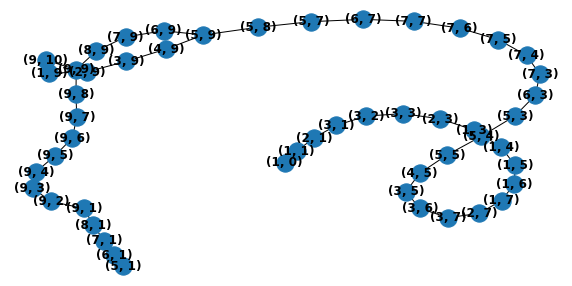

In [7]:
#-----------------------------------------------------------------------------
#                                  Main
#-----------------------------------------------------------------------------
#print("test classe:", GrapheJP.arc(graphe))

gr= GrapheJP()
#arc_du_graphe= gr.arc(graphe)
#print("Main: Arcs du graphe: %s" %arc_du_graphe)

#print(gr.parcoursLargeur(graphe))

gr.afficheGraphe(dic2)
#gr.affiche(graphe)

#gr.parcoursProfondeur(graphe)

#print(GrapheJP.cheminement)

   

In [8]:

#import fctgraphes as f
#from fctgraphes import dij_rec

#from fctgraphes import dij_rec

l,c = fg.dij_rec(dic2,depart_labyrinthe,arrive_labyrinthe)
print(f'Plus court chemin du dictionnaire: \n{dic2}:\n\nEst le chemin : \n{c}\n\nDe longueur : {l}')



Plus court chemin du dictionnaire: 
{(1, 0): {(1, 1): 1}, (1, 1): {(1, 0): 1, (2, 1): 1}, (1, 3): {(2, 3): 1, (1, 4): 1}, (1, 4): {(1, 3): 1, (1, 5): 1}, (1, 5): {(1, 4): 1, (1, 6): 1}, (1, 6): {(1, 5): 1, (1, 7): 1}, (1, 7): {(1, 6): 1, (2, 7): 1}, (1, 9): {(2, 9): 1}, (2, 1): {(1, 1): 1, (3, 1): 1}, (2, 3): {(1, 3): 1, (3, 3): 1}, (2, 7): {(1, 7): 1, (3, 7): 1}, (2, 9): {(1, 9): 1, (3, 9): 1}, (3, 1): {(2, 1): 1, (3, 2): 1}, (3, 2): {(3, 1): 1, (3, 3): 1}, (3, 3): {(2, 3): 1, (3, 2): 1}, (3, 5): {(4, 5): 1, (3, 6): 1}, (3, 6): {(3, 5): 1, (3, 7): 1}, (3, 7): {(2, 7): 1, (3, 6): 1}, (3, 9): {(2, 9): 1, (4, 9): 1}, (4, 5): {(3, 5): 1, (5, 5): 1}, (4, 9): {(3, 9): 1, (5, 9): 1}, (5, 1): {(6, 1): 1}, (5, 3): {(6, 3): 1, (5, 4): 1}, (5, 4): {(5, 3): 1, (5, 5): 1}, (5, 5): {(4, 5): 1, (5, 4): 1}, (5, 7): {(6, 7): 1, (5, 8): 1}, (5, 8): {(5, 7): 1, (5, 9): 1}, (5, 9): {(4, 9): 1, (5, 8): 1, (6, 9): 1}, (6, 1): {(5, 1): 1, (7, 1): 1}, (6, 3): {(5, 3): 1, (7, 3): 1}, (6, 7): {(5, 7): 1, (7, 7

In [10]:
#from fctgraphes import dij_rec
a= fg.titi()
a.toto()

tutu
